In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


La variable target est satisfaction

In [3]:
df = data.copy()

In [4]:
df.shape

(103904, 25)

In [5]:
df['satisfaction'].value_counts(normalize=True)*100

neutral or dissatisfied    56.666731
satisfied                  43.333269
Name: satisfaction, dtype: float64

# Feature Engineering

In [6]:
df['Services'] = df['Inflight wifi service'] + df['On-board service'] + df['Leg room service'] + df['Checkin service'] + df['Inflight service']

In [7]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Services
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,19
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,14
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,17
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,14
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,16


In [8]:
df.drop(['Unnamed: 0' , 'id'],axis=1,inplace=True)

In [9]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Services
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,19
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,14
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,17
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,14
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied,11
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied,24
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,16
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,19


# Valeur manquante

<AxesSubplot:>

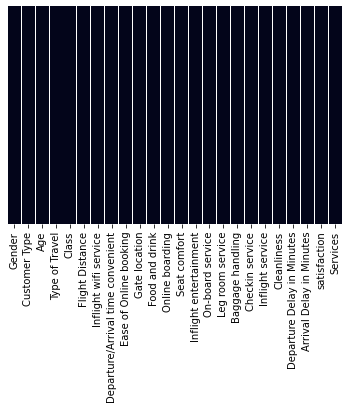

In [10]:
# Visualistion des valeurs manquantes
sns.heatmap(df.isnull() , yticklabels=False , cbar = False)

In [11]:
(df.isna().sum() / df.shape[0]).sort_values()

Gender                               0.000000
Departure Delay in Minutes           0.000000
Cleanliness                          0.000000
Inflight service                     0.000000
Checkin service                      0.000000
Baggage handling                     0.000000
Leg room service                     0.000000
On-board service                     0.000000
Inflight entertainment               0.000000
Seat comfort                         0.000000
satisfaction                         0.000000
Online boarding                      0.000000
Gate location                        0.000000
Ease of Online booking               0.000000
Departure/Arrival time convenient    0.000000
Inflight wifi service                0.000000
Flight Distance                      0.000000
Class                                0.000000
Type of Travel                       0.000000
Age                                  0.000000
Customer Type                        0.000000
Food and drink                    

In [12]:
# Traiter les valeurs manquantes
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [13]:
(df.isna().sum() / df.shape[0]).sort_values()

Gender                               0.0
Arrival Delay in Minutes             0.0
Departure Delay in Minutes           0.0
Cleanliness                          0.0
Inflight service                     0.0
Checkin service                      0.0
Baggage handling                     0.0
Leg room service                     0.0
On-board service                     0.0
Inflight entertainment               0.0
Seat comfort                         0.0
Online boarding                      0.0
Food and drink                       0.0
Gate location                        0.0
Ease of Online booking               0.0
Departure/Arrival time convenient    0.0
Inflight wifi service                0.0
Flight Distance                      0.0
Class                                0.0
Type of Travel                       0.0
Age                                  0.0
Customer Type                        0.0
satisfaction                         0.0
Services                             0.0
dtype: float64

<AxesSubplot:>

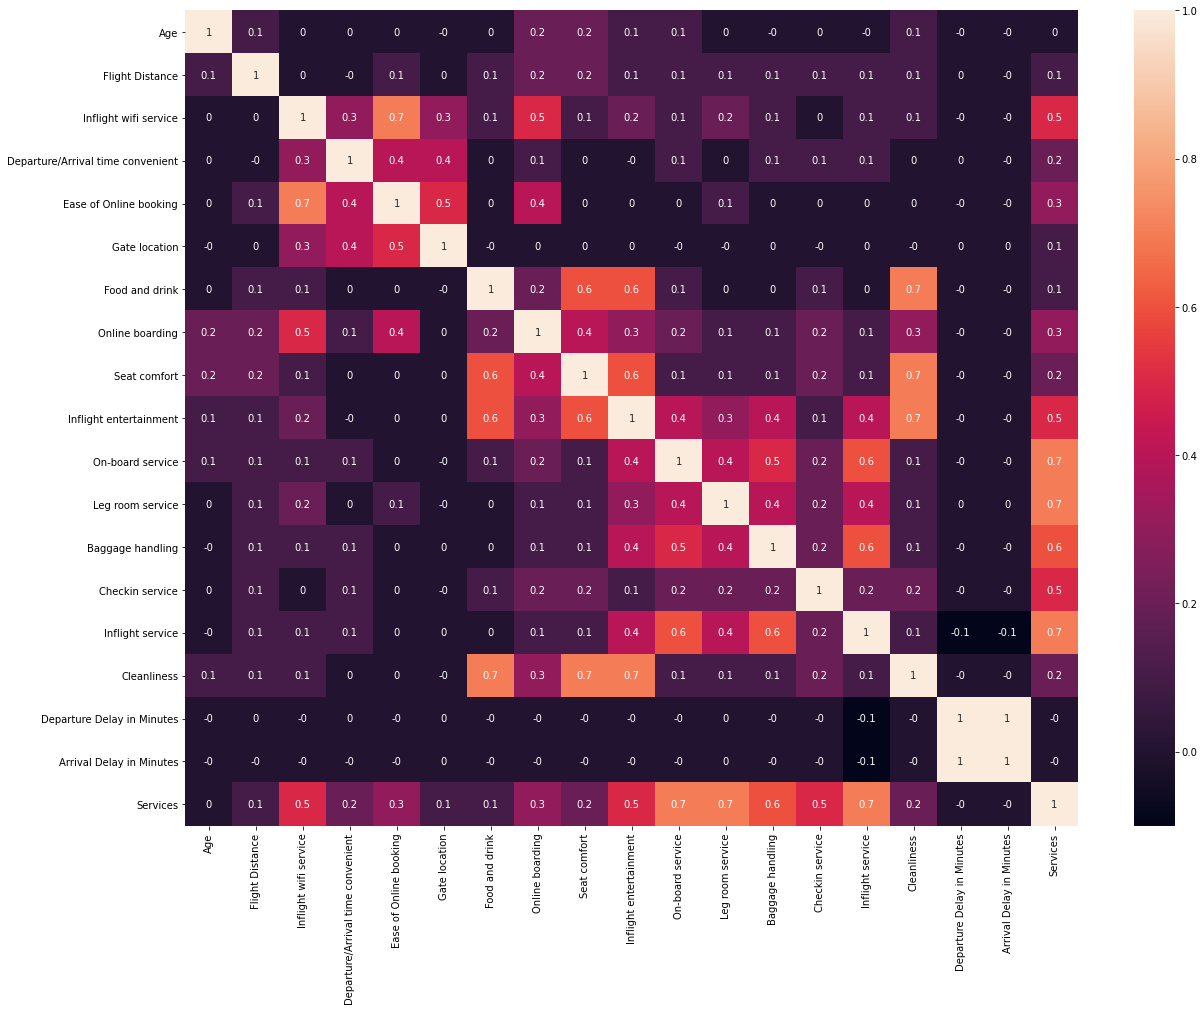

In [14]:
# Visualisation de la matrice de corrélation entre les variables
plt.figure(figsize=(20,15))
matrice_corr = df.corr().round(1)
sns.heatmap(data=matrice_corr , annot=True)

# Analyse Univarié

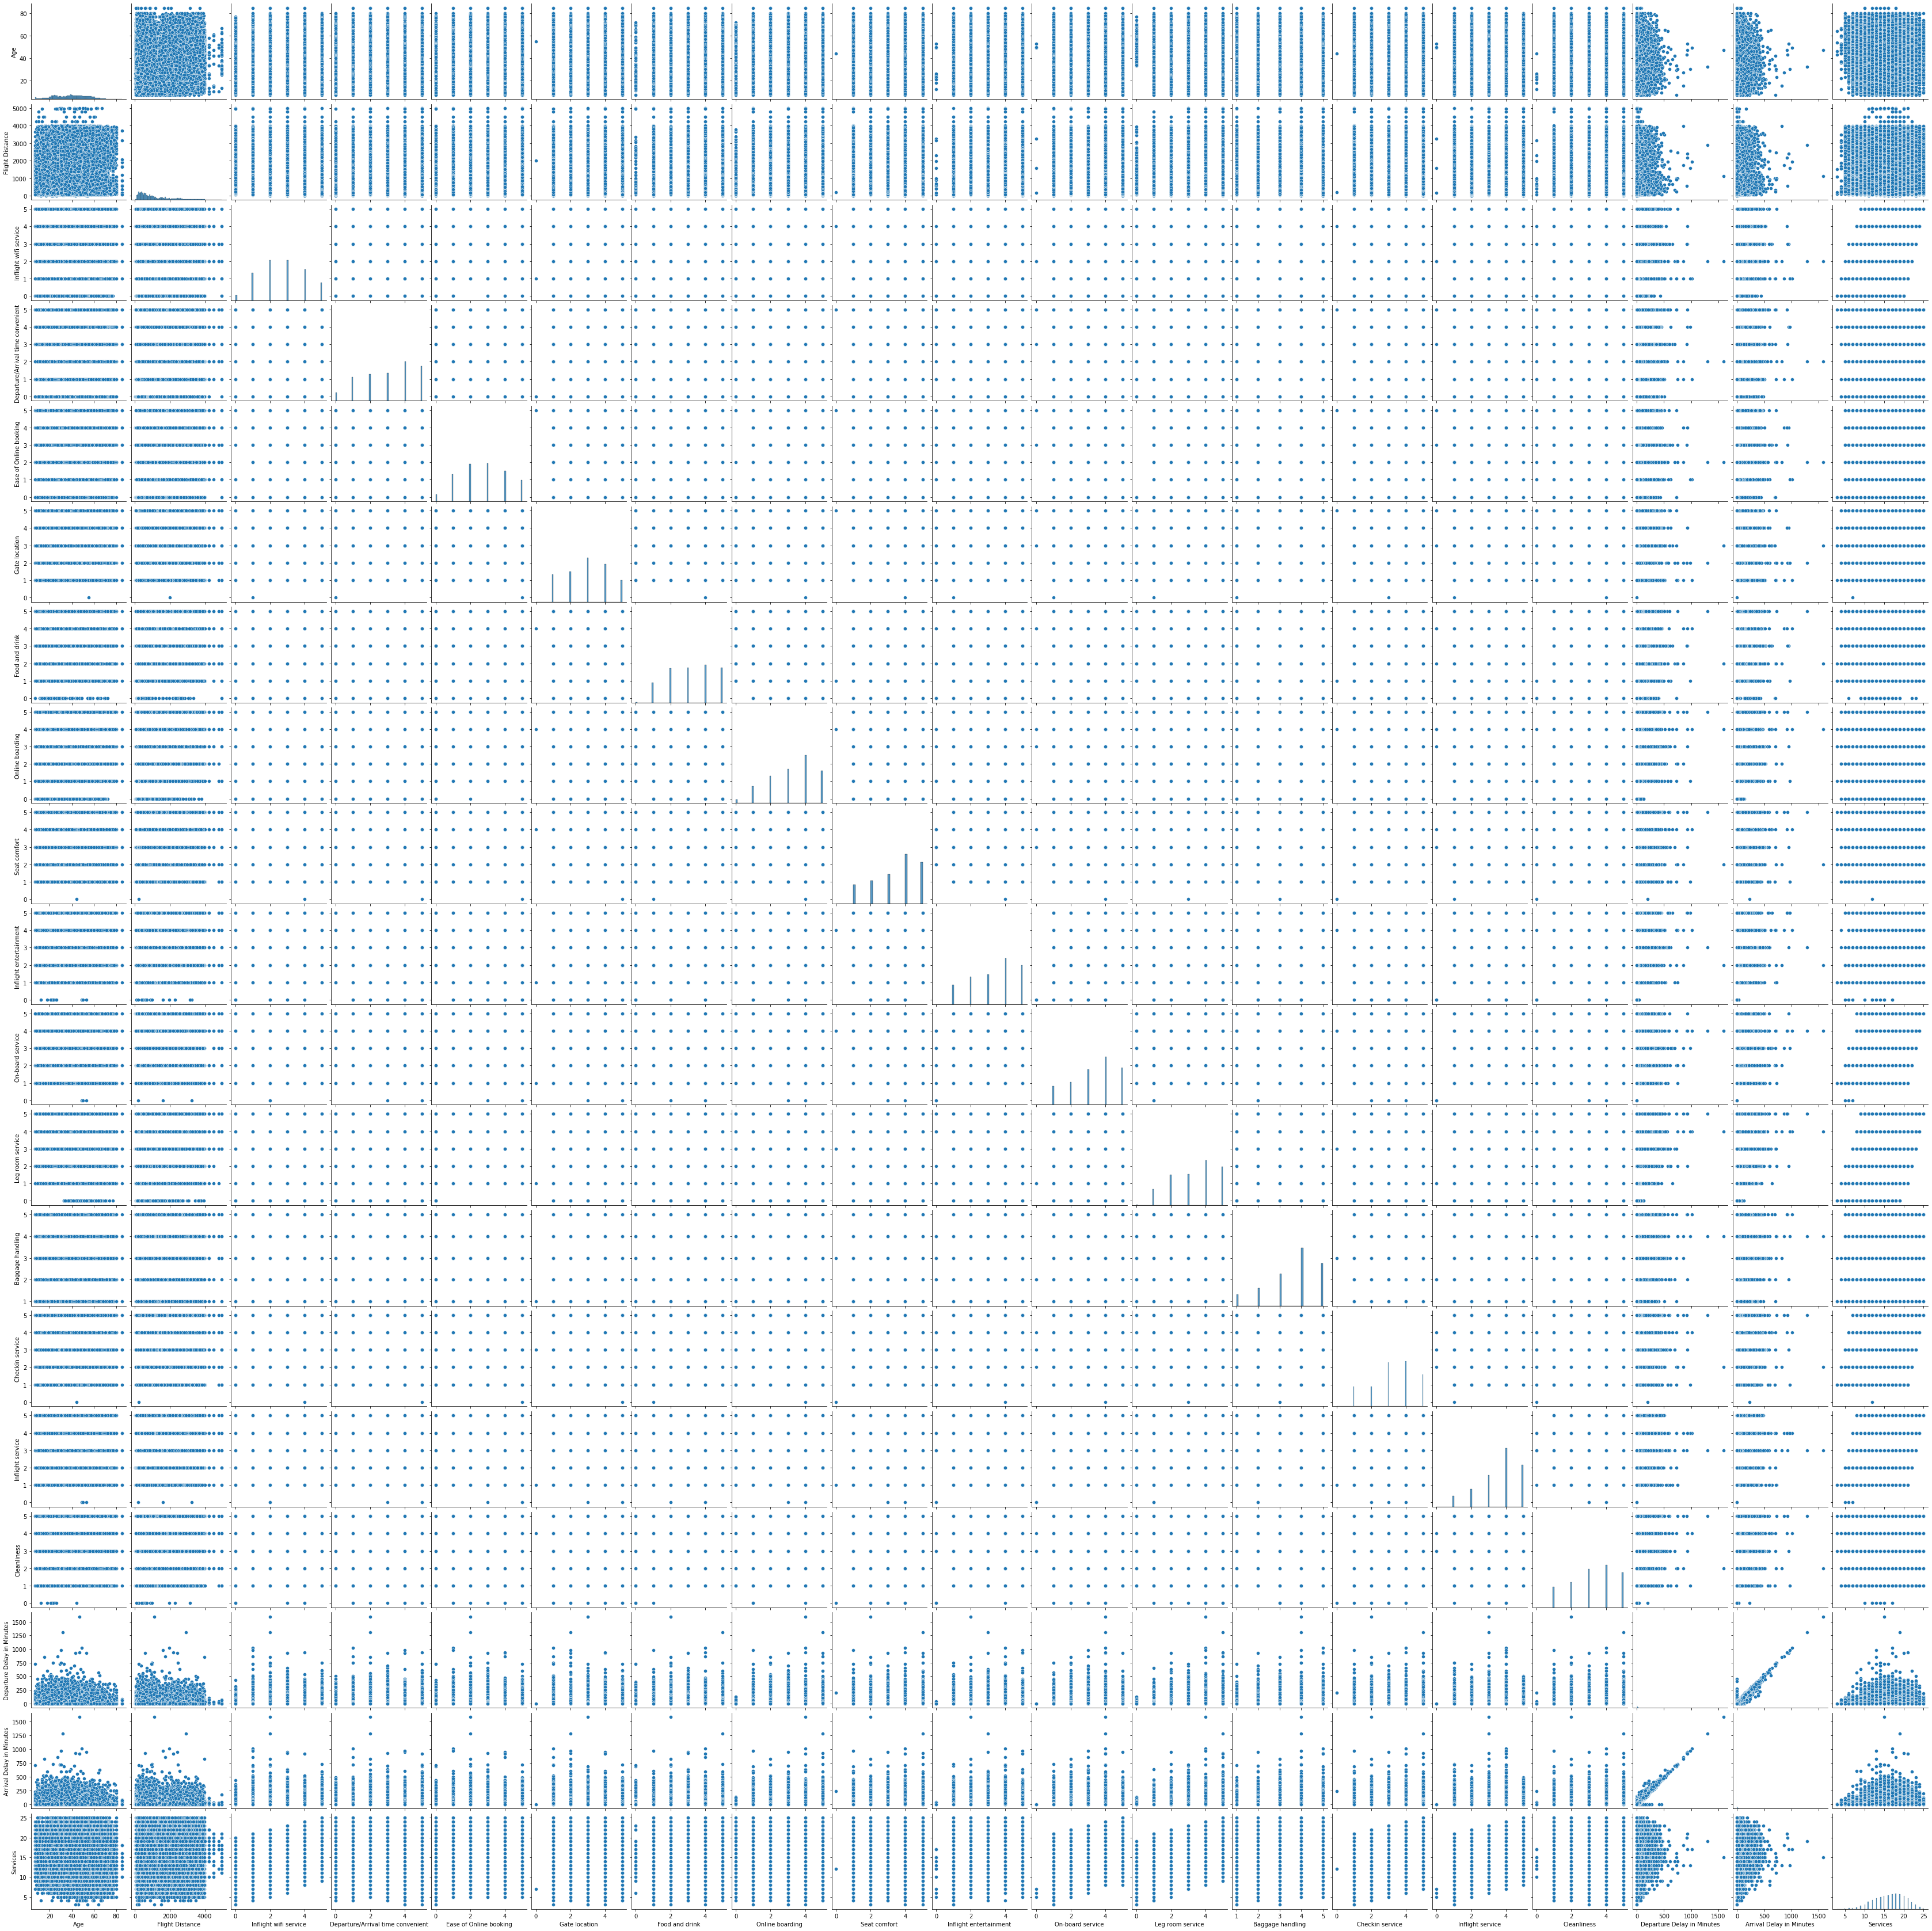

In [15]:
sns.pairplot(df)

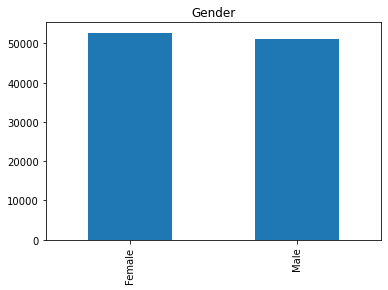

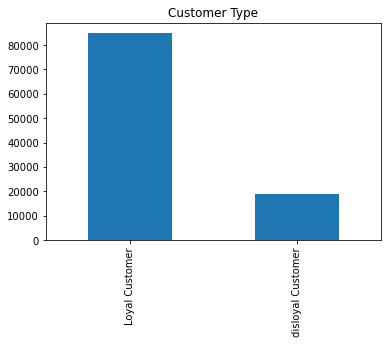

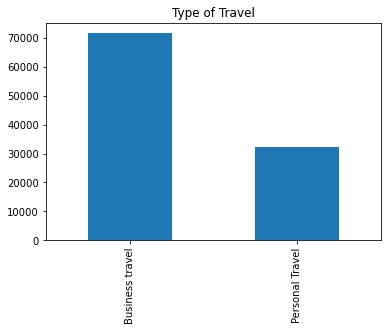

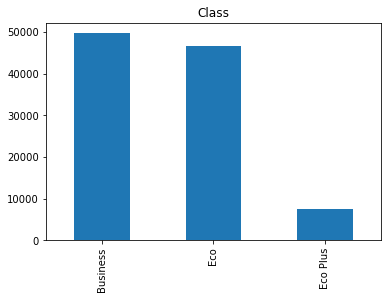

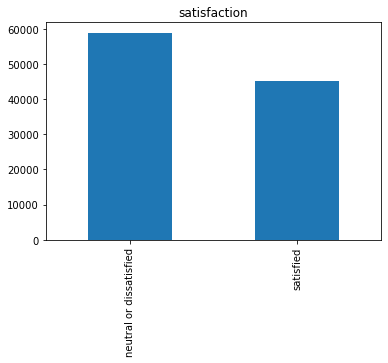

In [16]:
# Les variable catégoriques
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.bar()
    plt.title(col)

- Il y'a autant d'homme que de femme
- Il y'a beaucoup plus de clients fidéle que non fidéle
- La majorité des clients voyagent pour leur travaille
- Les voyageurs préférent voyager en buisness class
- Il y'a plus de clients qui sont neutre ou non satisfait que de client non satisfait

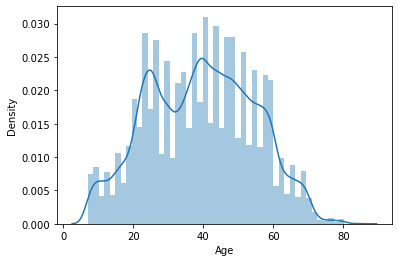

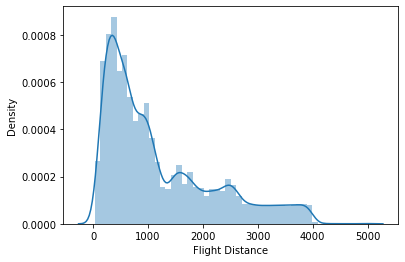

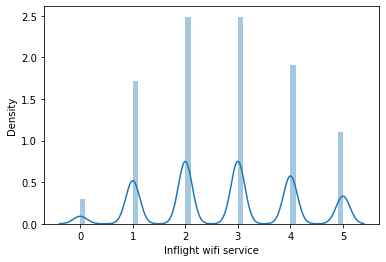

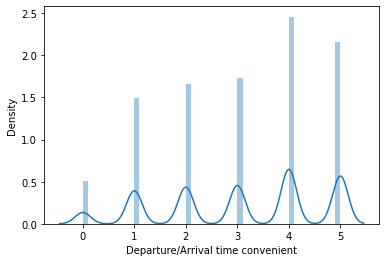

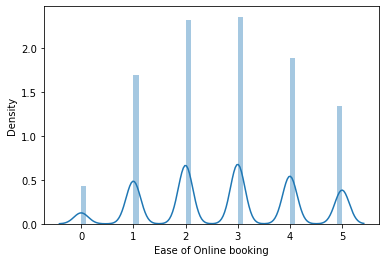

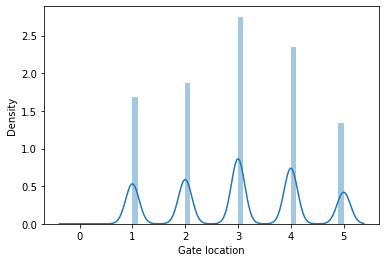

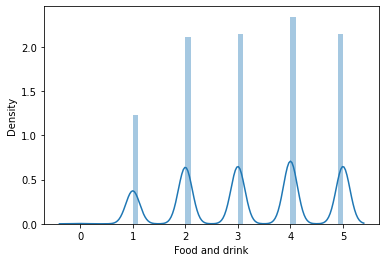

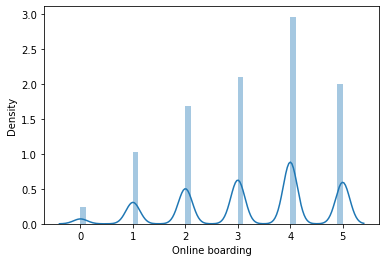

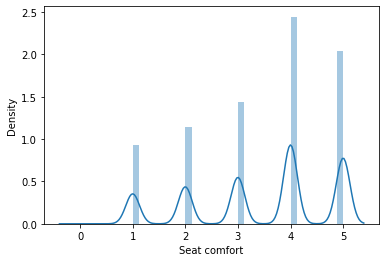

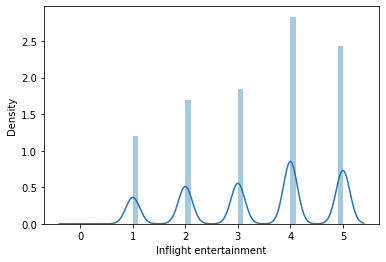

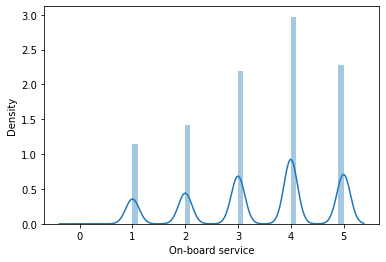

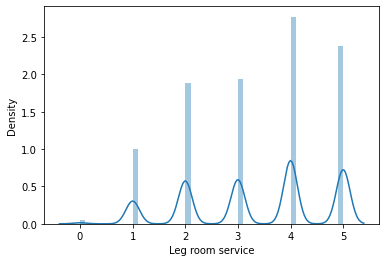

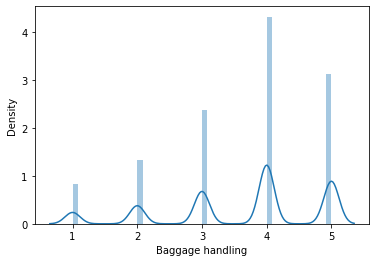

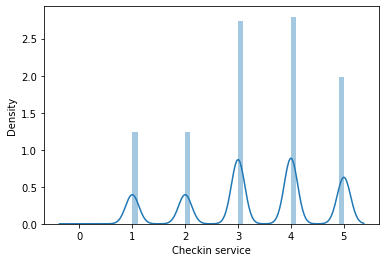

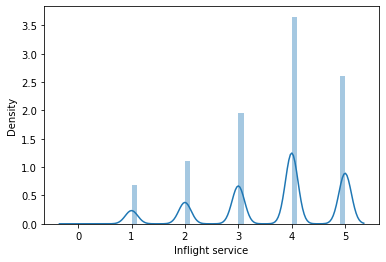

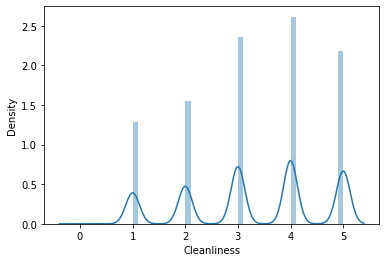

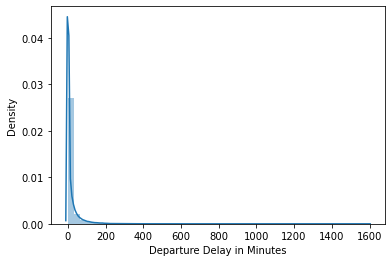

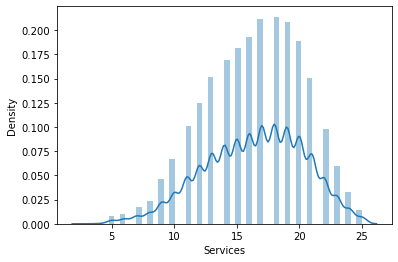

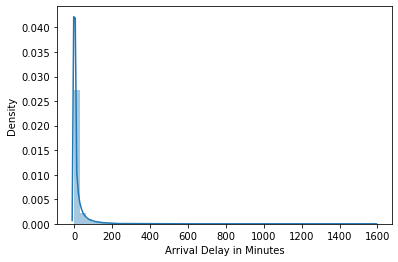

In [17]:
var_num = ['Age','Flight Distance','Inflight wifi service',
          'Departure/Arrival time convenient','Ease of Online booking',
           'Gate location','Food and drink','Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes','Services','Arrival Delay in Minutes']

for col in var_num:
    plt.figure()
    sns.distplot(df[col])

- La majorité des personnes font des voyages court avec cette compagnie aerienne
- La majorité des clients ont entre 20 et 60 ans
- La majorité des clients trouvent que le siége de l'avion est confortable
- La majorité des clients trouvent qu'ils sont bien traité par l'équipage au cours du vol
- Le service a bord est bien
- Le checkin service est relativement correct
- Les avions sont propres

De maniére général, l'avion propose un bon service à ces clients


# Analyse Bivarié

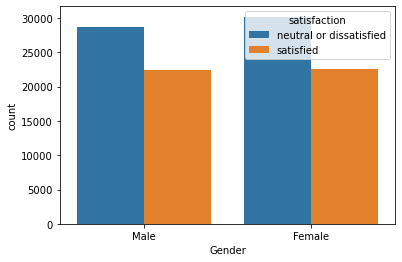

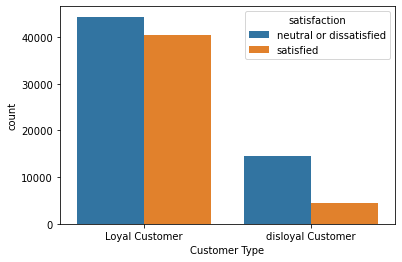

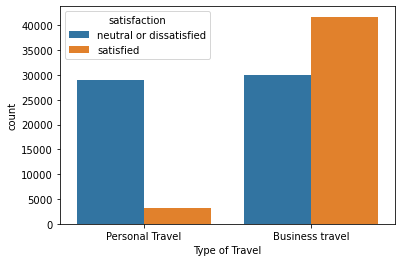

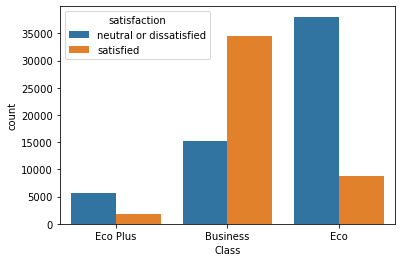

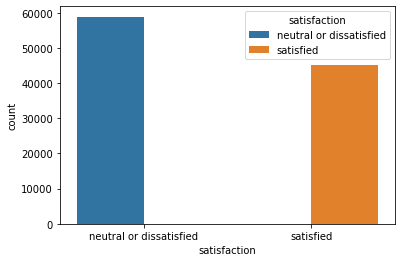

In [18]:
# Visualisation des relations entre les variables catégoriques et la target

for col in df.select_dtypes('object'):
    plt.figure()
    sns.countplot(x=col , data=df , hue='satisfaction')

- Les femmes sont moins satisfaite de leur voyage dans cette compagnie aerienne que les hommes
- Un client qui n'est pas loyal a plus de chance de ne pas être satisfait par son expérience dans l'avion qu'un client qui est fidéle à la compagnie
- Il y'a un gros travail à faire concernant les personnes qui voyage pour raison personnel. En effet, la majorité des personnes qui voyagent pour le travail sont satisfait de leur voyage alors que les personnes qui voyagent pour raison personnel ne le sont pas.
- Travail à faire sur la class eco car c'est là où la majorité des personnes non satisfaite ont voyagé.

De maniére global, il y'a plus de personnes qui ne sont pas satisfaite par leur voyage que les personnes qui sont satisfaitent.

<AxesSubplot:xlabel='Class', ylabel='count'>

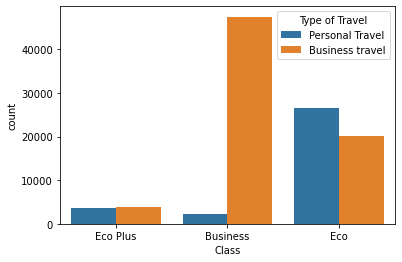

In [19]:
sns.countplot(x=df['Class'] , data=df , hue='Type of Travel')

On voit ici que pratiquement toutes les personnes qui voyagent pour le travail sont en business alors que la majorité des personnes qui voyagent pour raisons personnel sont en class éco

In [20]:
non_satisfait_df = df[df['satisfaction'] =='neutral or dissatisfied']
satisfait_df = df[df['satisfaction'] =='satisfied']

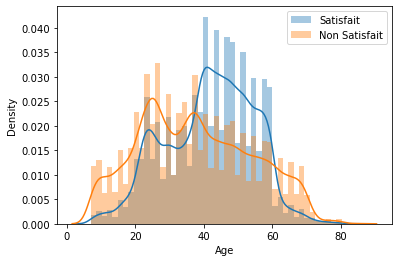

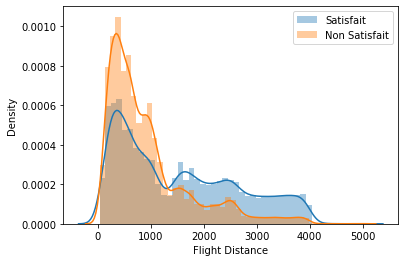

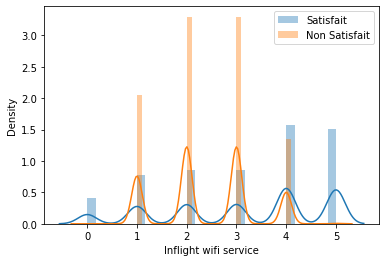

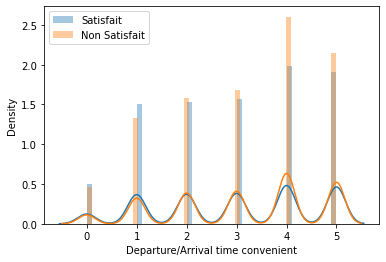

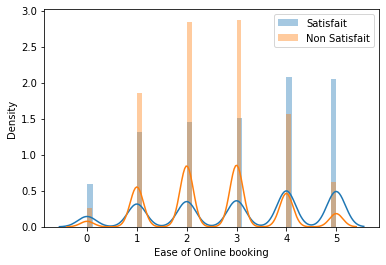

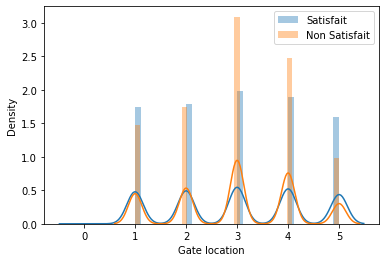

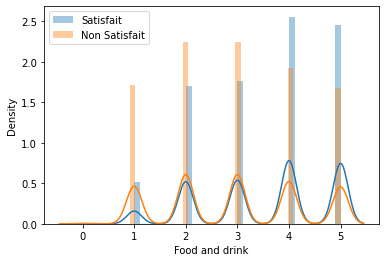

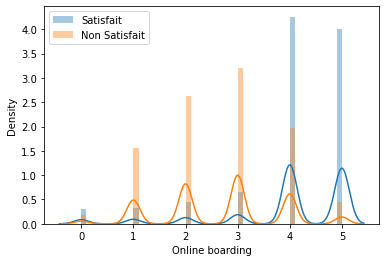

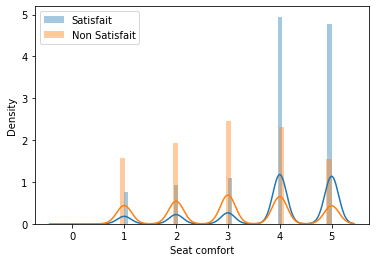

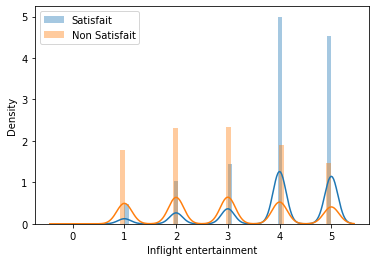

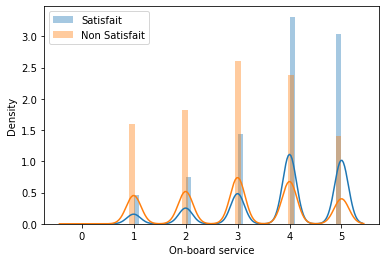

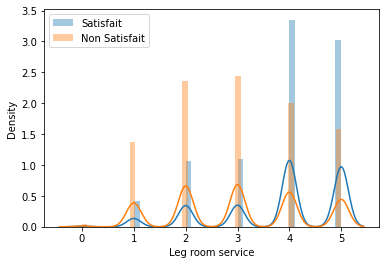

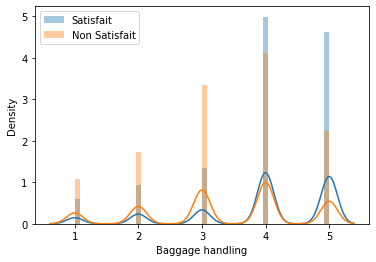

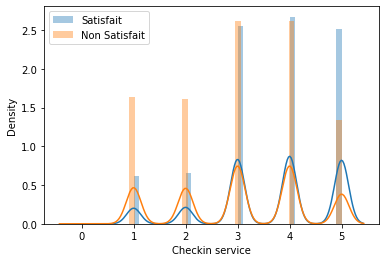

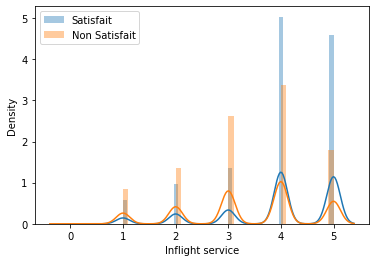

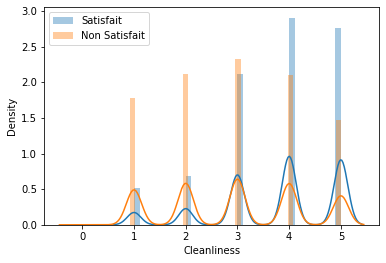

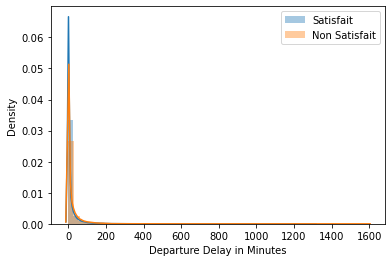

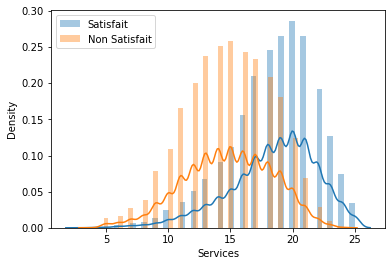

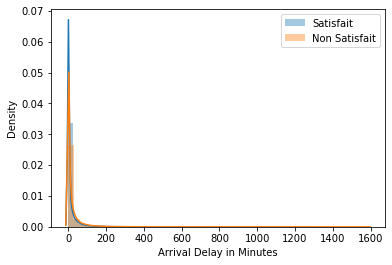

In [21]:
# Visualisation des relations entre les variables continue et la target

for col in var_num:
    plt.figure()
    sns.distplot(satisfait_df[col] , label='Satisfait')
    sns.distplot(non_satisfait_df[col] , label = 'Non Satisfait')
    plt.legend()

- Plus les personnes sont âgés plus elles sont satisfaite du voyage et au contraire plus elles sont jeunes et moins elles sont satisfaite
- Plus le vol durant longtemps, plus les personnes sont satisfaite du voyage, il y'a donc du succés sur les vols long courrier mais pas de succés sur des vols courts
- De maniére général , plus les personnes sont satisfaite par le service à bord , plus elles sont satisfaite de leur voyage. Cela va de même pour la propreté dans l'avion

# Encodage

In [22]:
var_cat = []

for col in df.select_dtypes('object'):
    var_cat.append(col)


In [23]:
df_cat = df[var_cat]
df_cat

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [24]:
df_cat = pd.get_dummies(df_cat , drop_first=True)
df_cat

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1,0,1,0,1,0
1,1,1,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,1,0,0,0,0,1
...,...,...,...,...,...,...
103899,0,1,0,1,0,0
103900,1,0,0,0,0,1
103901,1,1,0,0,0,0
103902,0,1,0,1,0,0


In [25]:
df_num = df[var_num]
df_num

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Services,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,19,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,14,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,17,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,14,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,11,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,24,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,16,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,19,0.0


In [26]:
# Concaténer les deux dataframe
df_encoded = pd.concat([df_cat , df_num] , axis=1)
df_encoded

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Services,Arrival Delay in Minutes
0,1,0,1,0,1,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,19,18.0
1,1,1,0,0,0,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,14,6.0
2,0,0,0,0,0,1,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,17,0.0
3,0,0,0,0,0,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,14,9.0
4,1,0,0,0,0,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,0,0,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,11,0.0
103900,1,0,0,0,0,1,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,24,0.0
103901,1,1,0,0,0,0,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,16,14.0
103902,0,1,0,1,0,0,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,19,0.0


In [27]:
X = df_encoded.drop(['satisfaction_satisfied'],axis=1)
y = df_encoded['satisfaction_satisfied']

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Spécifier la partie test et la partie train

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=6)
model = make_pipeline(StandardScaler() , MLPClassifier())
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.9581348347047784

In [49]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)

In [50]:
f1_score(y_test, y_pred, average=None)

array([0.96356784, 0.95079742])

In [51]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.95090503, 0.96821009])

In [52]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.97657245, 0.934     ])

In [53]:
err_train = np.mean(y_train != model.predict(X_train))
err_test  = np.mean(y_test  != model.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.03044885290473154
Error on the test sample:  0.0418651652952216
